In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import IsolationForest

%matplotlib inline

In [2]:
conn = pyodbc.connect(r"driver={SQL SERVER};server=LAPTOP-V88UBQAA\SQLSERVERVINCENT;database=AdventureWorks2016;trusted_connection=YES;")
conx_string = "driver={SQL SERVER};server=LAPTOP-V88UBQAA\SQLSERVERVINCENT;database=AdventureWorks2016;trusted_connection=YES;"
query2 = "SELECT TOP (1000) [PRS_START_TIME],[PRS_END_TIME],[PRS_STATE],[PRS_BUSINESS_KEY],try_convert(float, RIGHT(PRS_Business_key, len(PRS_BUSINESS_KEY) - charindex(':', prs_business_key))) as Business_Key, try_convert(float, DATEDIFF(MILLISECOND, PRS_START_TIME,PRS_END_TIME)) as Process_Time FROM [ORCHESTRA].[dbo].[ORC_PROCESS_STATE];"
SQLquery = pd.read_sql_query(query2, conn)
conx = pyodbc.connect(conx_string);
cursor = conx.cursor();
cursor.execute(query2);
data = cursor.fetchall()
df = pd.DataFrame(SQLquery, columns=['PRS_STATE','Business_Key', 'Process_Time'])
df = df.drop(31, axis=0) #dropping outlier datapoint

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,PRS_STATE,Business_Key,Process_Time
0,9.0,0.868326,8086.0
1,9.0,0.889375,8040.0
2,9.0,0.968228,8077.0
3,9.0,0.868139,8093.0
4,9.0,0.958527,8060.0


In [5]:
df.describe()

,PRS_STATE,Business_Key,Process_Time
count,322.000000,322.000000,322.000000
mean,4.807453,0.563755,6059.444099
std,2.757071,0.293119,2639.490088
min,3.000000,0.001954,37.000000
25%,3.000000,0.311440,4257.500000
50%,3.000000,0.598047,7046.500000
75%,9.000000,0.826857,8057.000000
max,9.000000,0.995729,9976.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 322
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRS_STATE     322 non-null    float64
 1   Business_Key  322 non-null    float64
 2   Process_Time  322 non-null    float64
dtypes: float64(3)
memory usage: 10.1 KB


In [7]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

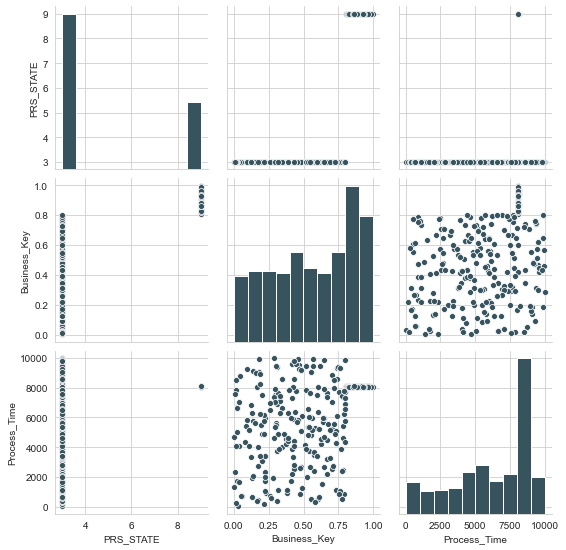

In [8]:
sns.pairplot(df)

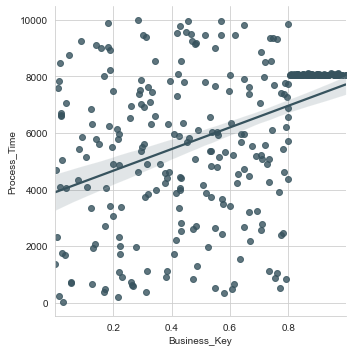

In [9]:
sns.lmplot(x='Business_Key',y='Process_Time',data=df)